In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./processed_data/death_nonzero.csv')
df.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,1017,Chambers County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,3,4,4
1,1071,Jackson County,AL,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
2,1077,Lauderdale County,AL,1,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
3,1081,Lee County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
4,1089,Madison County,AL,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [3]:
df_proc = df.drop(['countyFIPS', 'County Name', 'State', 'stateFIPS'], axis=1)
df_proc.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,3,4,4
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [4]:
class TrainLSTM():
    def __init__(self,dataset,look_back=7):
        self.look_back = look_back
        self.train, self.test = self.split(dataset)
        self.trainX, self.trainY = self.createDataset(self.train)
        self.testX, self.testY = self.createDataset(self.test)
        self.model = self.trainLSTM()
    
    def split(self, dataset, training_portion=1):
        train_size = int(len(dataset) * training_portion)  #0~1
        test_size = len(dataset) - train_size
        train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
        return train, test
    
    def createDataset(self,dataset):
        dataX, dataY = [], []
        for i in range(len(dataset)-self.look_back-1):
            a = dataset[i:(i+self.look_back)]
            dataX.append(a)
            dataY.append(dataset[i + self.look_back])
        return np.array(dataX), np.array(dataY)
    
    def trainLSTM(self):
        self.trainX = np.reshape(self.trainX, (self.trainX.shape[0], 1, self.trainX.shape[1]))
        #self.testX = np.reshape(self.testX, (self.testX.shape[0], 1, self.testX.shape[1]))
    
        # create and fit the LSTM network
        model = Sequential()
        model.add(LSTM(4, input_shape=(1, self.look_back)))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(self.trainX, self.trainY, epochs=100, batch_size=1, verbose=0)
        
        return model

    def plotResults(self):
        trainPredict = self.model.predict(self.trainX)
        train_scores = self.model.evaluate(self.trainX, self.trainY, verbose=0)
        y_pred = trainPredict.flatten()
        plt.plot(y_pred)
        plt.plot(self.trainY)
        plt.legend(['prediction','train_y'])
        plt.show()


In [5]:
data_all_county = []
for i in range(len(df_proc)):
    df_county = df_proc.loc[i]
    #print(df_county)
    df_county = df_county.to_numpy()
    data_all_county.append(df_county)

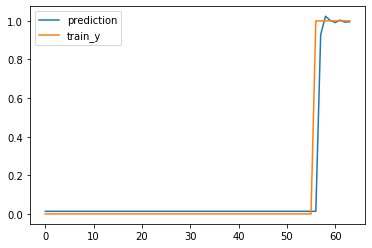

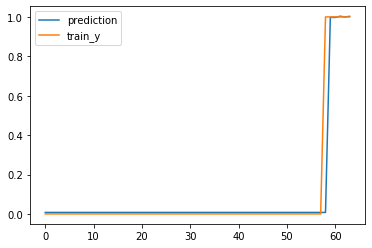

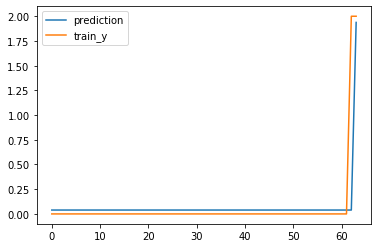

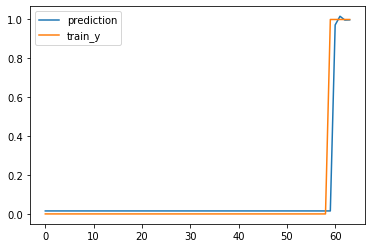

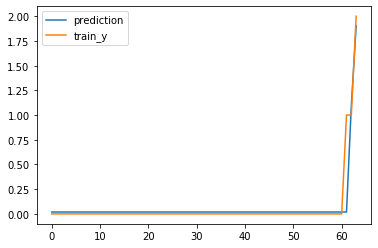

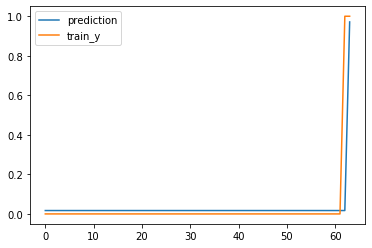

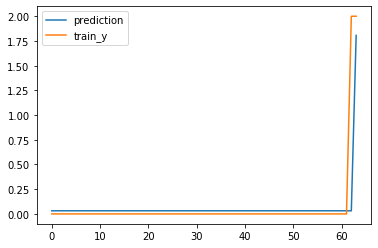

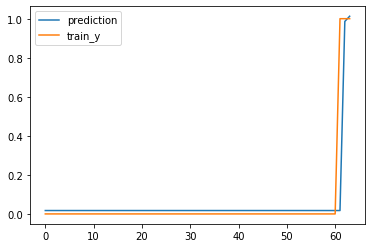

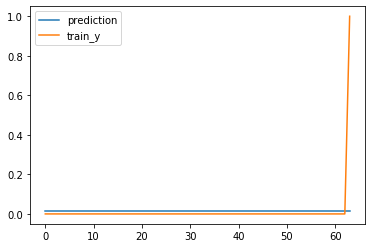

In [6]:
for dataset in data_all_county[1:10]:
    run = TrainLSTM(dataset)
    model = run.plotResults()